# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

print(weather_api_key)

# Incorporated citipy to determine city based on latitude and longitude
url = "https://api.openweathermap.org/data/2.5/weather?q="

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

1c992b6b18a2f6cb6b55bfcdd2f4a80f


## Generate Cities List

In [37]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#cities = requests.get(url).json()
print(json.dumps(cities, indent=4, sort_keys=True))

# Print the city count to confirm sufficient count
# len(cities)


[
    "mocajuba",
    "palabuhanratu",
    "kapaa",
    "hithadhoo",
    "itoman",
    "atuona",
    "victoria",
    "novopetrovskoye",
    "asau",
    "punta arenas",
    "le port",
    "rikitea",
    "cape town",
    "touros",
    "bluff",
    "cayenne",
    "safi",
    "ushuaia",
    "narsaq",
    "albany",
    "la ronge",
    "vaini",
    "new norfolk",
    "puerto ayora",
    "mataura",
    "isangel",
    "bogorodskoye",
    "torbay",
    "bor",
    "nouakchott",
    "beaverlodge",
    "blagoyevo",
    "thompson",
    "sarakhs",
    "yellowknife",
    "hualmay",
    "nikolskoye",
    "tiarei",
    "illoqqortoormiut",
    "san patricio",
    "ketchikan",
    "kattivakkam",
    "hami",
    "hermanus",
    "mahebourg",
    "georgetown",
    "ribeira grande",
    "port alfred",
    "qaanaaq",
    "chokurdakh",
    "pangnirtung",
    "koslan",
    "amderma",
    "pascagoula",
    "ayotzintepec",
    "carnarvon",
    "xai-xai",
    "price",
    "port lincoln",
    "severo-kurilsk",
    

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [92]:
# Lists to hold response
cloudiness = []
country = []
date = []
humidity = []
latitude = []
longitude = []
temperature = []
wind_speed = []


# Loop through cities and request data for each
for city in range(len(cities)):
    try:
        print(f"Processing Record {city} for {cities[city]}.")
        response = requests.get(url + cities[city] + "&units=imperial&appid=" + weather_api_key).json()
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temperature.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed']) 
    except KeyError:
        cloudiness.append(np.nan)
        country.append(np.nan)
        date.append(np.nan)
        humidity.append(np.nan)
        latitude.append(np.nan)
        longitude.append(np.nan)
        temperature.append(np.nan)
        wind_speed.append(np.nan) 
        print("City not found. Skipping...")

print("Record processing complete.")
        
# Create data frame
weather_dict = {
    "City": cities,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Latitude": latitude,
    "Longitude": longitude,
    "Max Temperature": temperature,
    "Wind Speed": wind_speed
}

Processing Record 0 for mocajuba.
Processing Record 1 for palabuhanratu.
City not found. Skipping...
Processing Record 2 for kapaa.
Processing Record 3 for hithadhoo.
Processing Record 4 for itoman.
Processing Record 5 for atuona.
Processing Record 6 for victoria.
Processing Record 7 for novopetrovskoye.
Processing Record 8 for asau.
Processing Record 9 for punta arenas.
Processing Record 10 for le port.
Processing Record 11 for rikitea.
Processing Record 12 for cape town.
Processing Record 13 for touros.
Processing Record 14 for bluff.
Processing Record 15 for cayenne.
Processing Record 16 for safi.
Processing Record 17 for ushuaia.
Processing Record 18 for narsaq.
Processing Record 19 for albany.
Processing Record 20 for la ronge.
Processing Record 21 for vaini.
Processing Record 22 for new norfolk.
Processing Record 23 for puerto ayora.
Processing Record 24 for mataura.
Processing Record 25 for isangel.
Processing Record 26 for bogorodskoye.
Processing Record 27 for torbay.
Processi

City not found. Skipping...
Processing Record 212 for bengkulu.
Processing Record 213 for makakilo city.
Processing Record 214 for quatre cocos.
Processing Record 215 for batsfjord.
Processing Record 216 for bosaso.
Processing Record 217 for sur.
Processing Record 218 for yulara.
Processing Record 219 for saint-louis.
Processing Record 220 for sinnamary.
Processing Record 221 for mackay.
Processing Record 222 for mocambique.
City not found. Skipping...
Processing Record 223 for honningsvag.
Processing Record 224 for benguela.
Processing Record 225 for cherbourg.
Processing Record 226 for bilma.
Processing Record 227 for gangtok.
Processing Record 228 for shirokiy.
Processing Record 229 for andenes.
Processing Record 230 for guayaramerin.
Processing Record 231 for bathsheba.
Processing Record 232 for orumiyeh.
Processing Record 233 for bridlington.
Processing Record 234 for puerto baquerizo moreno.
Processing Record 235 for monaghan.
Processing Record 236 for benton.
Processing Record 2

Processing Record 421 for kaka.
Processing Record 422 for kieta.
Processing Record 423 for oriximina.
Processing Record 424 for tucupita.
Processing Record 425 for grindavik.
Processing Record 426 for talusan.
Processing Record 427 for la palma.
Processing Record 428 for bentiu.
Processing Record 429 for avera.
Processing Record 430 for iracoubo.
Processing Record 431 for biak.
Processing Record 432 for ola.
Processing Record 433 for viedma.
Processing Record 434 for marsabit.
Processing Record 435 for karlskoga.
Processing Record 436 for aragarcas.
Processing Record 437 for barawe.
City not found. Skipping...
Processing Record 438 for kolpashevo.
Processing Record 439 for ancud.
Processing Record 440 for brownwood.
Processing Record 441 for salalah.
Processing Record 442 for samarai.
Processing Record 443 for lasa.
Processing Record 444 for port macquarie.
Processing Record 445 for wattegama.
Processing Record 446 for namatanai.
Processing Record 447 for aleppo.
Processing Record 448 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [94]:
# Create data frame
weather_data = pd.DataFrame.from_dict(weather_dict, orient = 'columns')

weather_data.dropna(0,how='any')

# Export city data into .csv file
weather_data.to_csv('weather_data.csv')

# Display the data frame
weather_data.head(20)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,mocajuba,100.0,BR,1.584244e+09,98.0,-2.58,-49.51,75.38,2.42
1,palabuhanratu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,kapaa,20.0,US,1.584244e+09,64.0,22.08,-159.32,77.00,13.87
3,hithadhoo,74.0,MV,1.584244e+09,63.0,-0.60,73.08,83.25,5.37
4,itoman,75.0,JP,1.584244e+09,48.0,26.12,127.67,64.40,17.22
5,atuona,28.0,PF,1.584244e+09,67.0,-9.80,-139.03,82.47,8.03
6,victoria,20.0,HK,1.584244e+09,49.0,22.29,114.16,75.99,6.93
7,novopetrovskoye,75.0,RU,1.584244e+09,79.0,55.99,36.47,19.40,11.18
8,asau,90.0,RO,1.584244e+09,59.0,46.43,26.40,36.00,14.99
9,punta arenas,99.0,CL,1.584244e+09,67.0,-53.15,-70.92,57.20,16.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

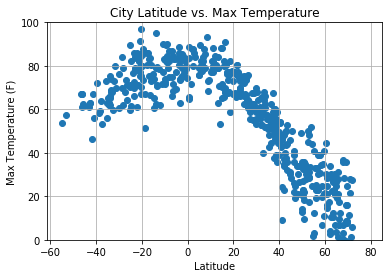

In [134]:
x_axis = weather_data['Latitude']
y_axis = weather_data['Max Temperature']
plt.title("City Latitude vs. Max Temperature")
plt.ylim(0,100)
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig("WeatherPyImages/lat_temp.png")

plt.show() 

#### Latitude vs. Humidity Plot

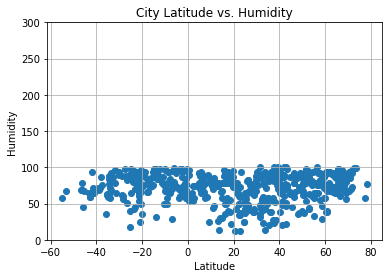

In [135]:
x_axis = weather_data['Latitude']
y_axis = weather_data['Humidity']
plt.title("City Latitude vs. Humidity")
plt.ylim(0,300)
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("WeatherPyImages/lat_humidity.png")

plt.show() 

#### Latitude vs. Cloudiness Plot

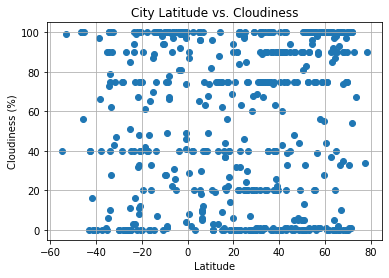

In [136]:
x_axis = weather_data['Latitude']
y_axis = weather_data['Cloudiness']
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("WeatherPyImages/lat_cloudiness.png")

plt.show() 

#### Latitude vs. Wind Speed Plot

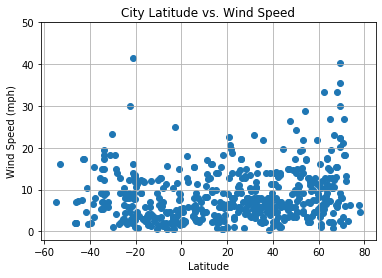

In [137]:
x_axis = weather_data['Latitude']
y_axis = weather_data['Wind Speed']
plt.title("City Latitude vs. Wind Speed")
plt.ylim(-2,50)
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("WeatherPyImages/lat_wind.png")

plt.show() 

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [109]:
# Create Northern and Southern Hemisphere DataFrames

northern_hemisphere = weather_data.query('Latitude > 0')

southern_hemisphere = weather_data.query('Latitude < 0')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

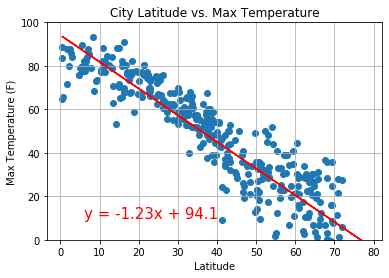

In [140]:
x_axis = northern_hemisphere['Latitude']
y_axis = northern_hemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs. Max Temperature")
plt.ylim(0,100)
plt.grid(True)

plt.scatter(x_axis, y_axis)
#plt.scatter(x_axis, data, marker = "o", facecolors="red", 

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig("WeatherPyImages/lat_temp_regression_north.png")

plt.show() 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

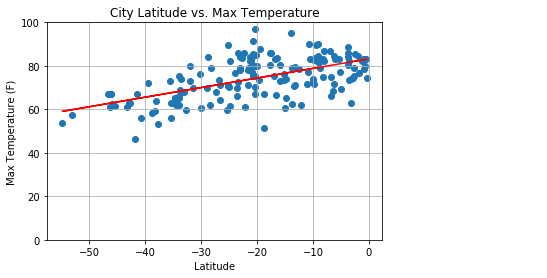

In [141]:
x_axis = southern_hemisphere['Latitude']
y_axis = southern_hemisphere['Max Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs. Max Temperature")
plt.ylim(0,100)
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

plt.savefig("WeatherPyImages/lat_temp_regression_south.png")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

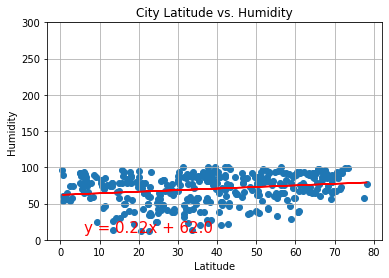

In [142]:
x_axis = northern_hemisphere['Latitude']
y_axis = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs. Humidity")
plt.ylim(0,300)
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("WeatherPyImages/lat_humidity_regression_north.png")

plt.show() 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

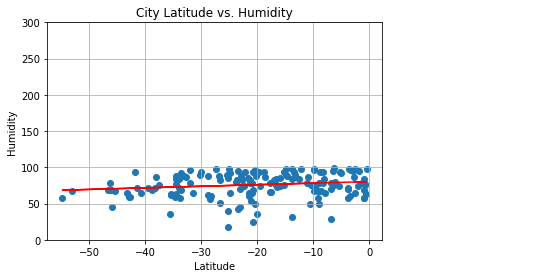

In [143]:
x_axis = southern_hemisphere['Latitude']
y_axis = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs. Humidity")
plt.ylim(0,300)
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

plt.savefig("WeatherPyImages/lat_humidity_regression_south.png")

plt.show() 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

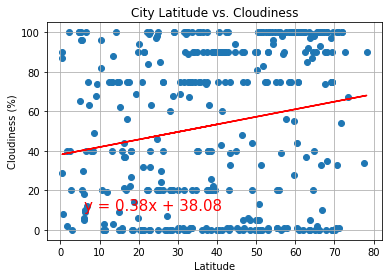

In [144]:
x_axis = northern_hemisphere['Latitude']
y_axis = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("WeatherPyImages/lat_cloudiness_regression_north.png")

plt.show() 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

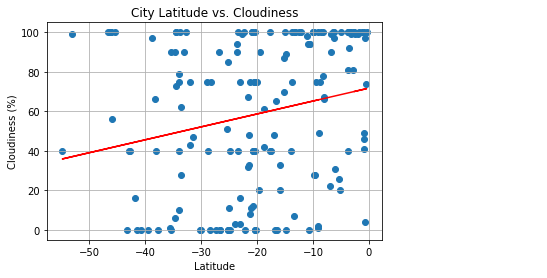

In [145]:
x_axis = southern_hemisphere['Latitude']
y_axis = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("WeatherPyImages/lat_cloudiness_regression_south.png")

plt.show() 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

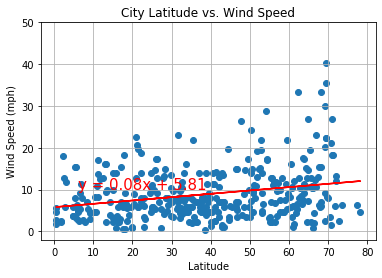

In [146]:
x_axis = northern_hemisphere['Latitude']
y_axis = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs. Wind Speed")
plt.ylim(-2,50)
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("WeatherPyImages/lat_wind_regression_north.png")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

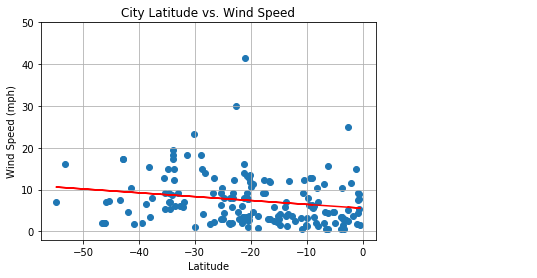

In [147]:
x_axis = southern_hemisphere['Latitude']
y_axis = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.title("City Latitude vs. Wind Speed")
plt.ylim(-2,50)
plt.grid(True)

plt.scatter(x_axis, y_axis)

plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("WeatherPyImages/lat_wind_regression_south.png")

plt.show()